## LIST API
https://pomber.github.io/covid19/timeseries.json
https://api.kawalcorona.com/

## DATASET
https://github.com/datasets/covid-19

In [4]:
import pandas as pd
import urllib.request, json 

#get data
with urllib.request.urlopen("https://pomber.github.io/covid19/timeseries.json") as url:
    data = json.loads(url.read().decode())
    print(data)

{'Afghanistan': [{'date': '2020-1-22', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-23', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-24', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-25', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-26', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-27', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-28', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-29', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-30', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-31', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-2-1', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-2-2', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-2-3', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-2-4', 'confirmed': 0, 'deaths': 0, 'recovered': 0}, {'date': '2020-2-5', 'confirmed': 0

In [10]:
data["Indonesia"][0]["date"]

'2020-1-22'

In [41]:
# make function for calculation
def getDataFrameByCountry(country):
    dataCountry = data[country]
    keyList = ["date", "confirmed", "deaths", "recovered"]
    df = pd.DataFrame(columns = keyList)
    for key in keyList:
        df[key] = [x[key] for x in dataCountry]
    df["date"] = pd.to_datetime(df["date"])
    return df

def getDifConfirmed(dfCountry):
    confirmedList = dfCountry.confirmed.values
    dif = [0, ]
    lenData = confirmedList.shape[0]
    for index in range(lenData - 1):
        dif.append(confirmedList[index+1] - confirmedList[index])
    return dif
    

In [69]:
#getDifConfirmed(getDataFrameByCountry("Indonesia"))

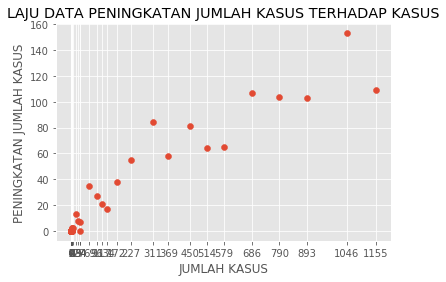

In [68]:
# make function for plot
import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.title("LAJU DATA PENINGKATAN JUMLAH KASUS TERHADAP KASUS")
plt.ylabel("PENINGKATAN JUMLAH KASUS")
plt.xlabel("JUMLAH KASUS")
plt.scatter(getDataFrameByCountry("Indonesia").confirmed, getDifConfirmed(getDataFrameByCountry("Indonesia")))
plt.xticks(getDataFrameByCountry("Indonesia").confirmed)
plt.show()